<a href="https://colab.research.google.com/github/FadlyHaikal/DigitRecognition/blob/main/digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install streamlit==1.13.0
!npm install -g localtunnel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 4.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=58cc4ec47bcd243cfeb396d86e7101f39747f5f8a141d3336d2f6e68bf98fc06
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb7

In [3]:
!pip install streamlit-drawable-canvas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import os 
from sklearn.model_selection import train_test_split
import zipfile
from PIL import Image as pilImage
import zipfile

In [6]:
!wget --no-check-certificate \
    "https://github.com/FadlyHaikal/DigitRecognition/archive/refs/heads/main.zip" \
    -O "/tmp/DigitRecognition_Dataset.zip"

zip_ref = zipfile.ZipFile('/tmp/DigitRecognition_Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-01-09 16:36:39--  https://github.com/FadlyHaikal/DigitRecognition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/FadlyHaikal/DigitRecognition/zip/refs/heads/main [following]
--2023-01-09 16:36:40--  https://codeload.github.com/FadlyHaikal/DigitRecognition/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781243 (2.7M) [application/zip]
Saving to: ‘/tmp/DigitRecognition_Dataset.zip’

/tmp/DigitRecogniti 100%[===================>]   2.65M  14.9MB/s    in 0.2s    

2023-01-09 16:36:40 (14.9 MB/s) - ‘/tmp/DigitRecognition_Dataset.zip’ saved [2781243/2781243]



Preprocess

In [7]:
def drawSquare(image):
	'''
	Draws a square around the found digits
	'''		
	b = [0,0,0]
	height, width = image.shape[0], image.shape[1]
	if(height == width): ## if square
		square = image
		return square
	else:
		d_size = cv2.resize(image, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
		height, width = height * 2, width * 2
		if (height > width):
			padding = int((height - width)/2)
			d_size_square = cv2.copyMakeBorder(d_size, 0, 0, padding, padding, cv2.BORDER_CONSTANT, None,value=b)
		else:
			padding = int((width - height)/2)
			d_size_square = cv2.copyMakeBorder(d_size, padding, padding, 0, 0, cv2.BORDER_CONSTANT, None,value=b)

	return d_size_square

In [8]:
def resize(image, dim):
	'''
	Returns orignal image resized to shape 'dim'
	'''	
	b = [0,0,0]	 			
	dim = dim - 4
	squared = image
	r = (float(dim) / squared.shape[1])
	d = (dim, int(squared.shape[0] * r))
	resized = cv2.resize(image, d, interpolation = cv2.INTER_AREA)
	height, width = resized.shape[0], resized.shape[1];
	if (height > width):
		resized = cv2.copyMakeBorder(resized, 0,0,0,1, cv2.BORDER_CONSTANT, value=b)
	if (height < width):
		resized = cv2.copyMakeBorder(resized, 1,0,0,0, cv2.BORDER_CONSTANT, value=b)

	resized = cv2.copyMakeBorder(resized, 2,2,2,2,cv2.BORDER_CONSTANT, value=b)
	height, width = resized.shape[0], resized.shape[1]	
	
	return resized	

KNN

In [9]:
def get_path_list(root_path):
    # compute list directories in root path
    root = os.listdir(root_path) 
    # initilize array to store folder path in root directory 
    folder_path_list = [] 

    # looping through root directory
    for index, folder_path in enumerate(root):
        # append folder path
        folder_path_list.append(folder_path)

    return folder_path_list

In [10]:
def get_class_id(root_path, train_names):
    # initilize array to store image and class id
    image_list = []
    image_class_list = []

    # looping through list of folder or train names path
    for image_class, folder_path in enumerate(train_names):
        full_folder_path = f'{root_path}/{folder_path}'
        # compute list image path
        folder = os.listdir(full_folder_path)
        # looping through list of image in folder
        for index, image_path in enumerate(folder):
            full_image_path =  f'{full_folder_path}/{image_path}'
            # load the image
            image = cv2.imread(full_image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.GaussianBlur(image, (5,5), 0)
            image_vector = cv2.resize(image, (20,20)).flatten()
            
            # append image list with the image
            image_list.append(image_vector)
            # append image class list with class of the image
            image_class_list.append(image_class)
    
    image_list = np.array(image_list).astype(np.float32)
    image_class_list = np.array(image_class_list).astype(np.float32)
    
    return image_list, image_class_list

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
train_root_path = "/tmp/DigitRecognition-main/dataset/train/"
train_root_path = './drive/MyDrive/Digit_Dataset/train'
train_names = get_path_list(train_root_path)
train_image_list, image_classes_list = get_class_id(train_root_path, train_names)

(X_train, X_test, y_train, y_test) = train_test_split(train_image_list, image_classes_list, test_size=0.25, random_state=42)

# Using K-NN(k- nearest neighbors) as the ML algorithm
classifier_knn = cv2.ml.KNearest_create()
classifier_knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
response, result, neighbours, distance = classifier_knn.findNearest(X_test, k=3)

# Testing and calculating the accuracy of knn classifier
correct = result == y_test
correct = np.count_nonzero(correct)
accuracy = correct * (100.0/result.size)
print ("Accuracy: ", accuracy)

Accuracy:  40.0


In [54]:
# Loading the digits data
data = cv2.imread('/tmp/DigitRecognition-main/dataset/digits.png')
gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# Resizing each digit from 20x20 to 10x10
resized = cv2.pyrDown(gray)

# Splitting image original image into 5000 different arrays of size 20x20
# Resulting array: 50 * 100 * 20 * 20
arr = [np.hsplit(i, 100) for i in np.vsplit(gray, 50)]
arr = np.array(arr)
print ("Resulting Shape", arr.shape)

# Spliting into training and test set
# Total: 5000, Train: 3500 images, Test: 1500
X_train = arr[:, :70].reshape(-1, 400).astype(np.float32)
X_test = arr[:, 70:100].reshape(-1, 400).astype(np.float32)

## Targets for each image
y = [0,1,2,3,4,5,6,7,8,9]

y_train = np.repeat(y, 350)[:, np.newaxis]
y_test = np.repeat(y, 150)[:, np.newaxis] 

# Using K-NN(k- nearest neighbors) as the ML algorithm
classifier_knn = cv2.ml.KNearest_create()
classifier_knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
response, result, neighbours, distance = classifier_knn.findNearest(X_test, k=3)

# Testing and calculating the accuracy of knn classifier
correct = result == y_test
correct = np.count_nonzero(correct)
accuracy = correct * (100.0/result.size)
print ("Accuracy: ", accuracy)

Resulting Shape (50, 100, 20, 20)
Accuracy:  93.46666666666667


In [55]:
classifier_knn.save('/tmp/DigitRecognition-main/KNN_Trained_Model.pt')

In [56]:
classifier_knn_new = cv2.ml.KNearest.load('/tmp/DigitRecognition-main/KNN_Trained_Model.pt')

In [57]:
def recognize_digit(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)

  canny = cv2.Canny(blur, 30, 150)

  contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  boundingBoxes = [cv2.boundingRect(c) for c in contours]
  contours, _ = zip(*sorted(zip(contours, boundingBoxes),key=lambda b:b[1][0], reverse=False))

  # Found number in the image
  display = []

  for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
      
    if w>= 5 and h>=20:
      area = blur[y:y+h, x:x+w]
      ret, area = cv2.threshold(area, 127, 255, cv2.THRESH_BINARY_INV)
          
      new_square = drawSquare(area)
      number = resize(new_square, 20)
      result = number.reshape((1, 400)); 
      result = result.astype(np.float32);
      ret, res, neighbours, distance = classifier_knn_new.findNearest(result, k=1)
      n = str(int(float(res[0])))
      display.append(n)

      # draw rectangle around individual digit
      cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 1)
      cv2.putText(image, n, (x,y-10), cv2.FONT_ITALIC, 2, (0,255,0), 2)

  return image, display

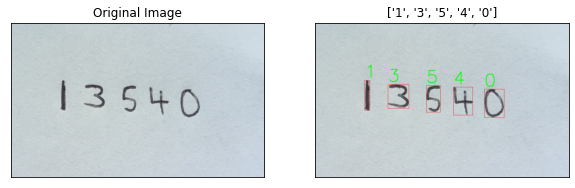

In [59]:
original = cv2.imread('/tmp/DigitRecognition-main/dataset/test/text.jpg')
resultImage, resultDigit = recognize_digit(cv2.imread('/tmp/DigitRecognition-main/dataset/test/text.jpg'))
plt.figure(figsize = (10, 8))
plt.subplot(121)
plt.imshow(original, cmap = 'gray')
plt.title("Original Image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(resultImage, "gray")
plt.title(resultDigit)
plt.xticks([]), plt.yticks([])
plt.show()

Streamlit

In [60]:
%%writefile app.py
import numpy as np
import streamlit as st
from streamlit_drawable_canvas import st_canvas
import cv2

# Create a canvas component
canvas_result = st_canvas(
    fill_color="rgba(255, 165, 0, 0.3)",  # Fixed fill color with some opacity
    stroke_width=3,
    stroke_color="black",
    background_color="#eee",
    background_image=None,
    update_streamlit=False,
    height=250,
    drawing_mode="freedraw",
    point_display_radius= 0,
    display_toolbar=True,
    key="full_app",
)

predict = st.button("Predict")

classifier_knn = cv2.ml.KNearest.load('./drive/MyDrive/KNN_Trained_Model.xml')

def drawSquare(image):
    '''
    Draws a square around the found digits
    '''		
    b = [0,0,0]
    height, width = image.shape[0], image.shape[1]
    if(height == width): ## if square
      square = image
      return square
    else:
      d_size = cv2.resize(image, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
      height, width = height * 2, width * 2
      if (height > width):
        padding = (height - width)/2; padding = int(padding)
        d_size_square = cv2.copyMakeBorder(d_size, 0, 0, padding, padding, cv2.BORDER_CONSTANT, None,value=b)
      else:
        padding = (width - height)/2; padding = int(padding)
        d_size_square = cv2.copyMakeBorder(d_size, padding, padding, 0, 0, cv2.BORDER_CONSTANT, None,value=b)

    return d_size_square

def resize(image, dim):
    '''
    Returns orignal image resized to shape 'dim'
    '''	
    b = [0,0,0]	 			
    dim = dim - 4
    squared = image
    r = (float(dim) / squared.shape[1])
    d = (dim, int(squared.shape[0] * r))
    resized = cv2.resize(image, d, interpolation = cv2.INTER_AREA)
    height, width = resized.shape[0], resized.shape[1];
    if (height > width):
      resized = cv2.copyMakeBorder(resized, 0,0,0,1, cv2.BORDER_CONSTANT, value=b)
    if (height < width):
      resized = cv2.copyMakeBorder(resized, 1,0,0,0, cv2.BORDER_CONSTANT, value=b)

    resized = cv2.copyMakeBorder(resized, 2,2,2,2,cv2.BORDER_CONSTANT, value=b)
    height, width = resized.shape[0], resized.shape[1]	
    
    return resized	

def recognize_digit(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 30, 150)

    contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    contours, _ = zip(*sorted(zip(contours, boundingBoxes),key=lambda b:b[1][0], reverse=False))

    # Found number in the image
    display = []

    for contour in contours:
      (x, y, w, h) = cv2.boundingRect(contour)
        
      if w>= 5 and h>=20:
        area = blur[y:y+h, x:x+w]
        ret, area = cv2.threshold(area, 127, 255, cv2.THRESH_BINARY_INV)
            
        new_square = drawSquare(area)
        number = resize(new_square, 20)
        result = number.reshape((1, 400)); 
        result = result.astype(np.float32);
        ret, res, neighbours, distance = classifier_knn.findNearest(result, k=1)
        n = str(int(float(res[0])))
        display.append(n)

        # draw rectangle around individual digit
        cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(image, n, (x,y-8), cv2.FONT_ITALIC, 0.7, (0,255,0), 2)

    return image, display

# Do something interesting with the image data and paths
if canvas_result.image_data is not None and predict:
    resImg, resDigit = recognize_digit(canvas_result.image_data)
    st.image(resImg)
    st.text("Digit Prediction : {}".format(resDigit))

Writing app.py


In [61]:
!streamlit run app.py & npx localtunnel --port 8501

2023-01-09 16:51:36.535 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[#######...........] \ postinstall: sill install executeActions

npx: installed 22 in 3.117s
your url is: https://seven-owls-poke-35-188-49-110.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.188.49.110:8501

  Stopping...
^C
